In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uber-request-data/Uber Request Data.csv


In [2]:
df=pd.read_csv("/kaggle/input/uber-request-data/Uber Request Data.csv")

In [3]:
df.shape

(6745, 6)

In [4]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


we have 6 columns : one column from them is integer and one is float and 4 is objects and we have 6745 rows

In [6]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format

df["Request timestamp"] = df["Request timestamp"].apply(lambda x: pd.to_datetime(x))

df["Drop timestamp"] = df["Drop timestamp"].apply(lambda x: pd.to_datetime(x))

/tmp/ipykernel_18/1051153114.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Request timestamp"] = df["Request timestamp"].apply(lambda x: pd.to_datetime(x))
/tmp/ipykernel_18/1051153114.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Drop timestamp"] = df["Drop timestamp"].apply(lambda x: pd.to_datetime(x))


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [8]:
df.describe()

,Request id,Driver id,Request timestamp,Drop timestamp
count,6745.000000,4095.000000,6745,2831
mean,3384.644922,149.501343,2016-09-04 08:49:18.446849536,2016-09-05 17:03:26.523843072
min,1.000000,1.000000,2016-07-13 00:00:24,2016-07-13 00:01:12
25%,1691.000000,75.000000,2016-07-14 07:38:26,2016-07-14 08:10:24.500000
50%,3387.000000,149.000000,2016-07-15 13:44:15,2016-07-15 15:27:41
75%,5080.000000,224.000000,2016-11-07 19:00:00,2016-11-07 19:25:30
max,6766.000000,300.000000,2016-12-07 23:54:00,2016-12-07 23:45:00
std,1955.099667,86.051994,NaN,NaN


In [9]:
# checking if there are any duplicate rows in the DataFrame
df.duplicated().any()

False

there aren't any duplicate rows in the DataFrame

In [10]:
# checking for the null values
df[df.columns[df.isnull().any()]].isnull().sum()

Driver id         2650
Drop timestamp    3914
dtype: int64

In [11]:
#Extract the hour from requested timestamp
df["Request hour"] = df["Request timestamp"].dt.hour
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


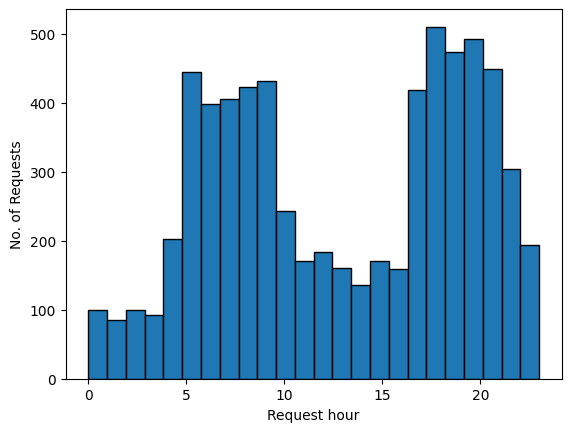

In [12]:
plt.hist(df["Request hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

Session details

EARLY MORNING = Midnight to 5AM

MORNING = 5AM to 10AM

 DAY  = 10AM to 5PM

EVENING = 5PM to 10PM

 LATE NIGHT = 10PM TO Midnight

In [13]:
#Divide the time of the day into five categories
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

In [14]:
df['Time period'] = df['Request hour'].apply(lambda x: time_period(x))
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time period
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [15]:
df['Time period'].value_counts()

Time period
Evening          2342
Morning          2103
Day Time         1224
Early Morning     578
Late Night        498
Name: count, dtype: int64

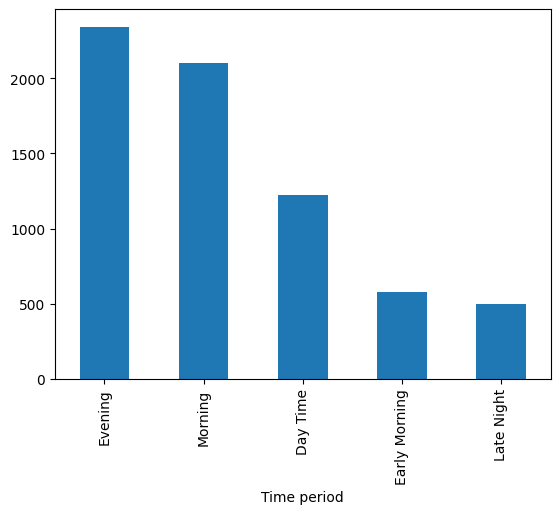

In [16]:
df['Time period'].value_counts().plot.bar()
plt.show()

**from the above plot , the requests is more in the Evening and we need to increase the number of drivers in the Evening hours from 5 PM to 10 PM**

In [17]:
# Extract the day from requested timestamp
df['Day'] = df['Request timestamp'].dt.day_name()
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time period,Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Wednesday


In [18]:
df['Day'].value_counts()

Day
Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: count, dtype: int64

Text(0.5, 1.0, 'Day distrbution')

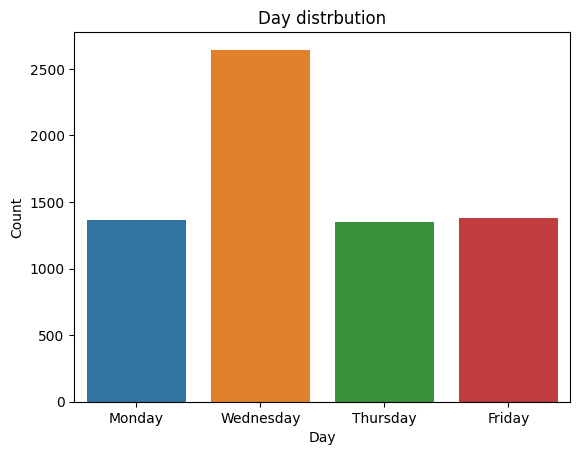

In [19]:
# countplot to show day disrbution
sns.countplot(x="Day",data=df)
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Day distrbution")


**from the above plot , the requests is more on wednesday so we need to increase the number of availabe drivers in this day**

# What is the Distribiution of Pickup point ?

<Axes: ylabel='count'>

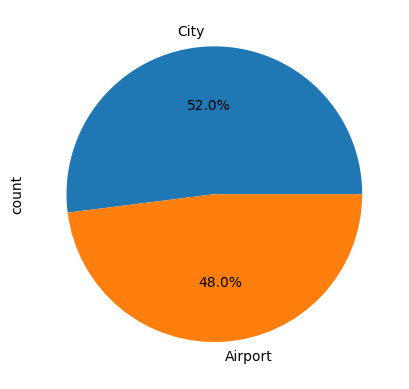

In [20]:
(df['Pickup point'].value_counts()/df.shape[0]*100).plot.pie(autopct="%1.1f%%")

**We find in the city there are more requests than the airport**

# What is the Distribiution of Staus of requests ?

Text(0.5, 1.0, 'Status distrbution')

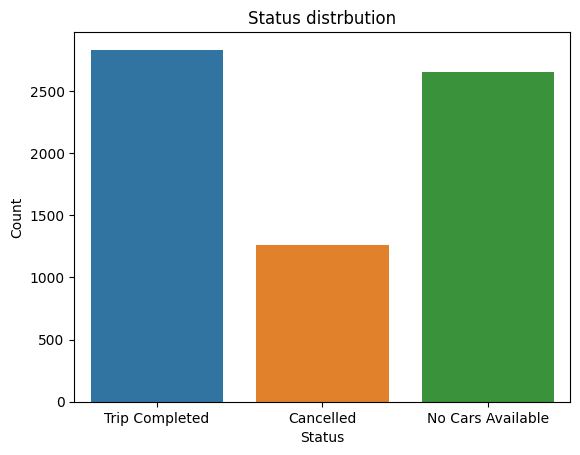

In [21]:
sns.countplot(x="Status",data=df)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status distrbution")

# Where we find more Cancelled Requests and no Cars Available in the city or at the airport ?

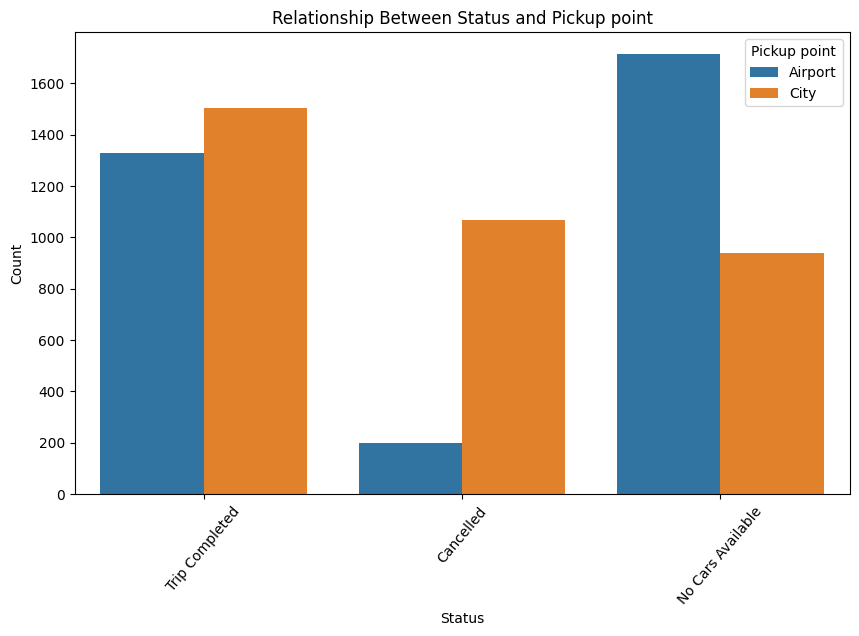

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Status", hue='Pickup point')
plt.title(f'Relationship Between Status and Pickup point')
plt.xlabel("Status")
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

**We find there are many No cars Avaliable at the Airport and we should increse the number of drivers there**